## 探索过拟合和欠拟合

探索两种常见的正则化技术（权重正则化和丢弃），并使用它们改进我们的 IMDB 影评分类

In [5]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [6]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)


In [7]:
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

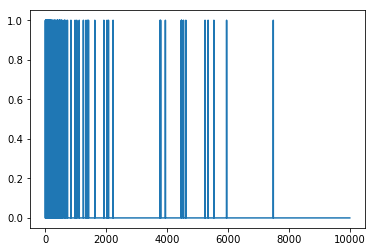

In [10]:
#字词索引按频率排序，因此索引 0 附近应该有更多的 1 值
plt.plot(train_data[0])
plt.show()

## 创建基准模型

In [11]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [12]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.4742 - accuracy: 0.8160 - binary_crossentropy: 0.4742 - val_loss: 0.3330 - val_accuracy: 0.8785 - val_binary_crossentropy: 0.3330
Epoch 2/20
25000/25000 - 4s - loss: 0.2482 - accuracy: 0.9123 - binary_crossentropy: 0.2482 - val_loss: 0.2861 - val_accuracy: 0.8887 - val_binary_crossentropy: 0.2861
Epoch 3/20
25000/25000 - 4s - loss: 0.1850 - accuracy: 0.9340 - binary_crossentropy: 0.1850 - val_loss: 0.2894 - val_accuracy: 0.8858 - val_binary_crossentropy: 0.2894
Epoch 4/20
25000/25000 - 4s - loss: 0.1514 - accuracy: 0.9484 - binary_crossentropy: 0.1514 - val_loss: 0.3125 - val_accuracy: 0.8778 - val_binary_crossentropy: 0.3125
Epoch 5/20
25000/25000 - 4s - loss: 0.1259 - accuracy: 0.9573 - binary_crossentropy: 0.1259 - val_loss: 0.3290 - val_accuracy: 0.8765 - val_binary_crossentropy: 0.3290
Epoch 6/20
25000/25000 - 4s - loss: 0.1061 - accuracy: 0.9665 - binary_crossentropy: 0.1061 - val_loss: 0.3554

## 创建一个更小的模型

In [13]:
#创建一个隐藏单元更少的模型，然后与我们刚刚创建的基准模型进行比较：
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [14]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6422 - accuracy: 0.6156 - binary_crossentropy: 0.6422 - val_loss: 0.5949 - val_accuracy: 0.6839 - val_binary_crossentropy: 0.5949
Epoch 2/20
25000/25000 - 3s - loss: 0.5465 - accuracy: 0.7800 - binary_crossentropy: 0.5465 - val_loss: 0.5284 - val_accuracy: 0.7818 - val_binary_crossentropy: 0.5284
Epoch 3/20
25000/25000 - 3s - loss: 0.4841 - accuracy: 0.8516 - binary_crossentropy: 0.4841 - val_loss: 0.4885 - val_accuracy: 0.8216 - val_binary_crossentropy: 0.4885
Epoch 4/20
25000/25000 - 3s - loss: 0.4408 - accuracy: 0.8866 - binary_crossentropy: 0.4408 - val_loss: 0.4607 - val_accuracy: 0.8524 - val_binary_crossentropy: 0.4607
Epoch 5/20
25000/25000 - 4s - loss: 0.4081 - accuracy: 0.9086 - binary_crossentropy: 0.4081 - val_loss: 0.4453 - val_accuracy: 0.8573 - val_binary_crossentropy: 0.4453
Epoch 6/20
25000/25000 - 3s - loss: 0.3818 - accuracy: 0.9238 - binary_crossentropy: 0.3818 - val_loss: 0.4304

## 创建一个更大的模型

In [16]:
#创建一个更大的模型，看看它多快开始过拟合。接下来，我们向这个基准添加一个容量大得多的网络，远远超出解决问题所需的容量：
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 20s - loss: 0.3437 - accuracy: 0.8527 - binary_crossentropy: 0.3437 - val_loss: 0.2941 - val_accuracy: 0.8807 - val_binary_crossentropy: 0.2941
Epoch 2/20
25000/25000 - 18s - loss: 0.1472 - accuracy: 0.9466 - binary_crossentropy: 0.1472 - val_loss: 0.3333 - val_accuracy: 0.8715 - val_binary_crossen